
<font style="font-family: Arial; font-size:2.25em;color:brown; font-style:bold">
Lab 8 -- Visualization  </font> <font style="font-family: Arial; font-size:1.5em;font-style:bold">(15 pts) </font>

Refer to notebook files we covered in class on 03/26 for some examples, including
`Lab8_example.ipynb`, which is in this folder.

### 1. **Data Clearning**

In [335]:
import pandas as pd

 **1.	(1pts) Read *titanic.csv* into a dataframe. Show names of all indices and columns.** 

In [337]:
titanicDF = pd.read_csv('titanic.csv')
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [338]:
titanicDF.index

RangeIndex(start=0, stop=891, step=1)

In [339]:
titanicDF.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

 **2.	(1pts) How many rows have null values? Find and show the result.**

In [341]:
titanicDF.isnull().any(axis = 1).sum()

708

In [342]:
rows_with_nulls = titanicDF[titanicDF.isnull().any(axis=1)]
print(rows_with_nulls)

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch        

 **3.	(1pts) How many columns have null values. Find and show the result.**

In [344]:
titanicDF.isnull().any(axis = 0).sum()

3

 **4.	(1pts) Which columns have null values? Find and show the result.**

In [346]:
columns_with_nulls = titanicDF.columns[titanicDF.isnull().any()].tolist()

print(f'Columns with null values: {columns_with_nulls}')


Columns with null values: ['Age', 'Cabin', 'Embarked']


 **5.	(1pts) From the above cell, you will see that columns `Age`, `Cabin`, and `Embarked` have null values. For each of these three columns, show how many null values there are.**

In [348]:
filter1 = titanicDF['Age'].isna()
print('null values for Age',titanicDF[filter1].shape[0])

filter2 = titanicDF['Cabin'].isna()
print('null values for Cabin',titanicDF[filter2].shape[0])

filter3 = titanicDF['Embarked'].isna()
print('null values for Embarked',titanicDF[filter3].shape[0])

null values for Age 177
null values for Cabin 687
null values for Embarked 2


 **6.	(1pts)  Drop the rows with null values in columns `Age` and `Embarked`. Hints: use the `pandas.DataFrame.dropna()` method with the `subset` parameter.**

- Save the result Dataframe in a new DataFrame.
- Print the shape of the original DataFrame before dropping the rows and print the shape of the new DataFrame after dropping.
 

In [350]:
print(f'Original DataFrame shape: {titanicDF.shape}')

new_titanicDF = titanicDF.dropna(subset=['Age', 'Embarked'])

print(f'New DataFrame shape after dropping rows with null values: {new_titanicDF.shape}')


Original DataFrame shape: (891, 12)
New DataFrame shape after dropping rows with null values: (712, 12)


 **7.	(1pts)  Use the `pandas.DataFrame.drop()` method to drop the columns `Cabin` and save the result in a new dataframe.**

- Print the shape of the new DataFrame after dropping to verify the success of the operation.

In [352]:
titanicDF_cleaned = new_titanicDF.drop(columns=['Cabin'])

print(f'New DataFrame shape after dropping the "Cabin" column: {titanicDF_cleaned.shape}')


New DataFrame shape after dropping the "Cabin" column: (712, 11)


### **2. Visualizing two Categorical variables -- grouped bar chart**

**8. (1 pt) Use `pandas.seaborn.countplot()` module to create a grouped bar chart that looks like the following, showing the number of male and female passengers of each class.** 
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://seaborn.pydata.org/tutorial/color_palettes.html 

<img src = "Images/PassengersByClass.png" width = 300>


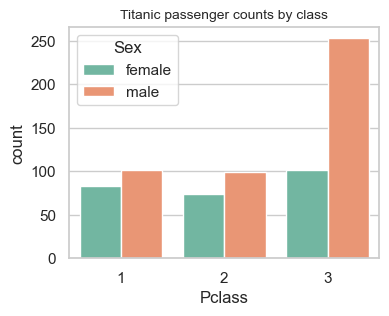

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 3))
sns.set(style="whitegrid", color_codes=True)
plt.title('Titanic passenger counts by class', fontsize=10)
sns.countplot(titanicDF_cleaned, x="Pclass", hue = 'Sex', palette = 'Set2');


### **3. Two categorical variables and a numerical variable -- grouped bar chart**

**9. (1 pt) Use `pandas.seaborn.barplot()` module to create a grouped bar chart that looks like the following, showing the mean age for male and female passengers grouped by their survival status.** 
- https://seaborn.pydata.org/generated/seaborn.barplot.html

<img src = "Images/MeanAge_BySurvived_Sex.png" width = 300>

(0.0, 40.0)

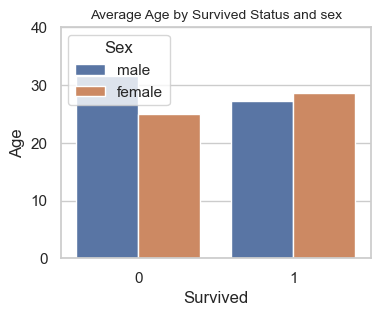

In [358]:
plt.figure(figsize=(4, 3))
sns.barplot(titanicDF_cleaned, x="Survived", y="Age", hue="Sex", errorbar = None) #not showing errorbar.
plt.title('Average Age by Survived Status and sex', fontsize=10)
plt.ylabel("Age")
plt.ylim(0,40)

### **4. Two categorical variables -- grouped count plot**

**10.1 The following example code illustrates applying a function into a column.** 

In [361]:
#Example code showing applying a function into a column.

def GenderAbbrev(sex):
    if sex == 'female':
        #print(int(age))
        return 'F'
    else:
        return 'M'
  
#create a new column 'GenderAbb' representing gender abbreviations
titanicDF_cleaned['GenderAbb'] = titanicDF_cleaned['Sex'].apply(GenderAbbrev )
titanicDF_cleaned.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,GenderAbb
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,F
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,M


**10.2 (2 pts) Complete the following tasks:**
1. Define a function that returns a string based on the parameter **age**. Specifically, 
    - return 'Seniors' if age is 50 or higher  
    - return 'Children' if age is lower than 18  
    - return 'Adults' if age is between 18 and 49, inclusive on both ends. 
    
2.Use the `Pandas.Series.apply()` function to apply the above function to the column **'Age'** of dataframe  **titanicDF_cleaned**. Save the transformed column data in a new column named **'AgeGroup'**.  

In [363]:
titanicDF_cleaned['Age'].isnull().any()

False

In [364]:
def getAgeGroup(age):
    if (age >= 50):
        return 'Seniors'
    elif (18 <= age <50):
        return 'Adults'
    else:
        return 'Children'

titanicDF_cleaned['AgeGroup'] = titanicDF_cleaned['Age'].apply(getAgeGroup)
titanicDF_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,GenderAbb,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,F,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,F,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,F,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,M,Adults


**11 (1 pt) use `seaborn.countplot()` to plot a grouped bar chart to show number of survived and not survived adults, seniors and children in the **titanicDF_cleaned** data frame. The following is an example graph.** 

<img src = "Images/AgeGroups_bySurvival.png" width = 300>




(0.0, 350.0)

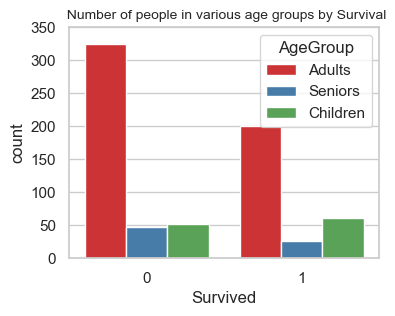

In [366]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(4, 3))
sns.countplot(titanicDF_cleaned, x="Survived", hue="AgeGroup", palette='Set1') #not showing errorbar.
plt.title(' Number of people in various age groups by Survival', fontsize=10)
plt.ylabel("count")
plt.ylim(0,350)

### **5. A Numerical variable -- box plot, histogram, kde plot and violin plot**


**12. (1 pt) Use `pandas.DataFrame.boxplot()` to create a box plot that looks like the following, separating the the survived and not survivied using the `by` parameter.** <br>
<img src = "Images/Boxplot_Age_BySurvived.png" width = 300>

Text(0.5, 0, 'Survived')

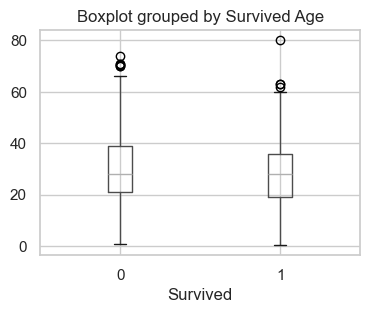

In [369]:
titanicDF_cleaned.boxplot(column='Age', by='Survived', grid=True,figsize=(4, 3))
plt.title('Boxplot grouped by Survived Age')
plt.suptitle('')
plt.xlabel('Survived')
#plt.ylabel('Age')


**13. (1 pt) Use `pandas.DataFrame.histplot()` to create a histogram for passenger ages, with kde curve included.**  
<img src = "Images/Hist_KDE.png" width = 300>

(0.0, 0.035)

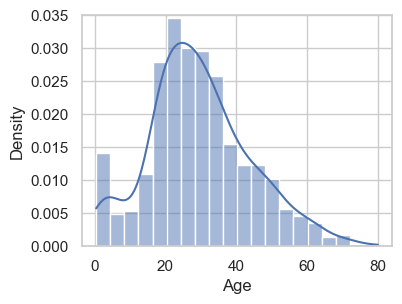

In [371]:
plt.figure(figsize=(4,3))
sns.histplot(x='Age', data=titanicDF_cleaned, stat='density', kde=True)
plt.ylim(0,0.035)

**14. (1 pt) Use `pandas.DataFrame.violinplot()` to create a violin plot for the `Age' column.**  
<img src = "Images/violin.png" width = 300>

<Axes: xlabel='Age'>

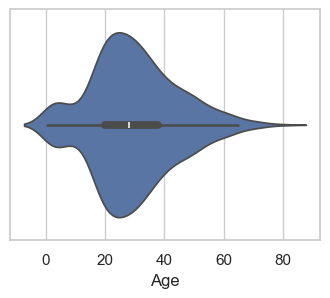

In [373]:
plt.figure(figsize=(4,3))
sns.violinplot(x='Age', data=titanicDF_cleaned)